In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import statsmodels.api  as sm
from sklearn.utils import resample
from scipy.stats import shapiro, mannwhitneyu
from scipy.stats import probplot


In [ ]:
match_data = pd.read_csv('match_data.csv')
match_info_data = pd.read_csv('match_info_data.csv')

/tmp/ipython-input-63-984235464.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.read_csv('match_data.csv')


In [ ]:
match_data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [ ]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243817 non-null  int64  
 1   season                  243817 non-null  object 
 2   start_date              243817 non-null  object 
 3   venue                   243817 non-null  object 
 4   innings                 243817 non-null  int64  
 5   ball                    243817 non-null  float64
 6   batting_team            243817 non-null  object 
 7   bowling_team            243817 non-null  object 
 8   striker                 243817 non-null  object 
 9   non_striker             243817 non-null  object 
 10  bowler                  243817 non-null  object 
 11  runs_off_bat            243817 non-null  int64  
 12  extras                  243817 non-null  int64  
 13  wides                   7652 non-null    float64
 14  noballs             

In [ ]:
match_info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1024 non-null   int64 
 1   season           1024 non-null   object
 2   city             973 non-null    object
 3   date             1024 non-null   object
 4   team1            1024 non-null   object
 5   team2            1024 non-null   object
 6   toss_winner      1024 non-null   object
 7   toss_decision    1024 non-null   object
 8   result           1024 non-null   object
 9   dl_applied       1024 non-null   int64 
 10  winner           1005 non-null   object
 11  win_by_runs      1024 non-null   int64 
 12  win_by_wickets   1024 non-null   int64 
 13  player_of_match  1019 non-null   object
 14  venue            1024 non-null   object
 15  umpire1          1024 non-null   object
 16  umpire2          1024 non-null   object
 17  umpire3          1021 non-null   

In [ ]:
match_info_data['date'] = pd.to_datetime(match_info_data['date'],errors='coerce')
team_runs_per_match = match_data.groupby(['match_id', 'batting_team'])['runs_off_bat'].sum().reset_index()
team_runs_per_match.rename(columns={'runs_off_bat': 'total_runs'},inplace=True)
merged = pd.merge(team_runs_per_match,match_info_data[['id','date','venue','team1','team2']], left_on='match_id', right_on='id')
merged.drop(columns=['id'],inplace=True)
merged['Period']= merged['date'].dt.year.apply(lambda x: 'Pre' if x < 2018 else 'Post')
merged['run_rate'] = merged['total_runs'] /20.0
merged['year'] = merged['date'].dt.year

In [ ]:
merged.head()

,match_id,batting_team,total_runs,date,venue,team1,team2,Period,run_rate,year
0,335982,Kolkata Knight Riders,205,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,10.25,2008
1,335982,Royal Challengers Bangalore,63,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,3.15,2008
2,335983,Chennai Super Kings,234,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,11.70,2008
3,335983,Kings XI Punjab,196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,9.80,2008
4,335984,Delhi Daredevils,122,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Pre,6.10,2008


In [ ]:
#normality test

pre_scores = merged[merged['Period'] == 'Pre']['total_runs']
post_scores = merged[merged['Period'] == 'Post']['total_runs']
pre_normality = shapiro(pre_scores.sample(n=500, random_state=1) if len (pre_scores)> 500 else pre_scores)
post_normality = shapiro(post_scores.sample(n=500, random_state=1) if len (post_scores)> 500 else pre_scores)
print("shapiro-wilk Test (Pre):", pre_normality)
print("shapiro-wilk Test (Post):", post_normality)

shapiro-wilk Test (Pre): ShapiroResult(statistic=np.float64(0.988417764270504), pvalue=np.float64(0.0005392374071367837))
shapiro-wilk Test (Post): ShapiroResult(statistic=np.float64(0.9845150224718922), pvalue=np.float64(3.6348381261299446e-05))


Shapiro-Wilk Test Result: ShapiroResult(statistic=np.float64(0.8508717526761667), pvalue=np.float64(2.4377983226251065e-21))


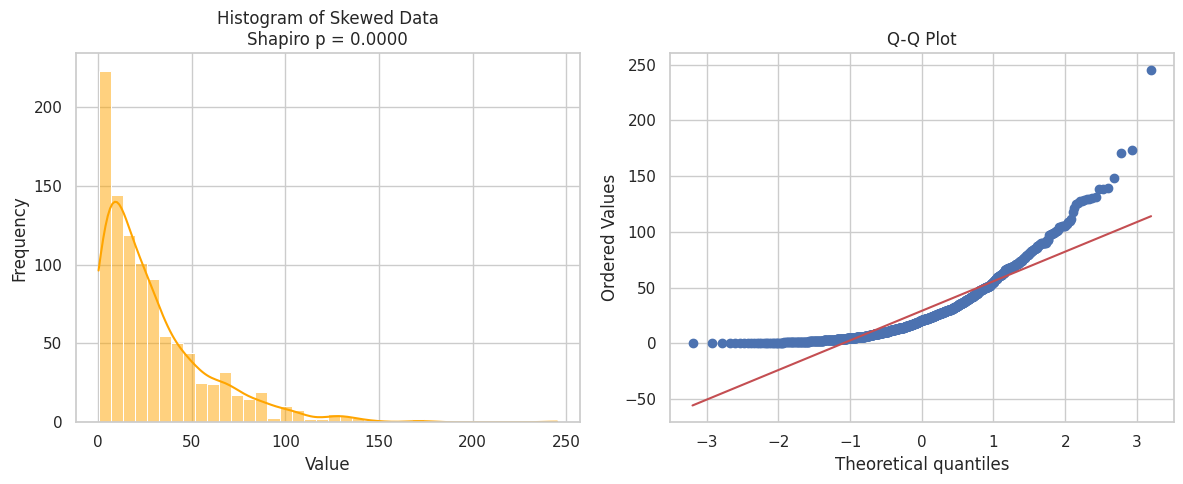

In [ ]:
# Generate right_skewed data using exponential distribution
np.random.seed(42)
skewed_data = np.random.exponential(scale=30, size=1000)

# Sharpiro-Wilk Test
shapiro_result = shapiro(skewed_data[:500])
print("Shapiro-Wilk Test Result:", shapiro_result)

# PLot histogram (not bell-shaped)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(skewed_data, kde=True, color='orange')
plt.title(f"Histogram of Skewed Data\nShapiro p = {shapiro_result.pvalue:.4f}")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Plot Q-Q plot (won't be a straight line if not normal)
plt.subplot(1, 2, 2)
probplot(skewed_data, dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.tight_layout()
plt.show()

In [ ]:
# Match type indicator (heuristic for playoffs)
match_counts = match_info_data.groupby(match_info_data['date'].dt.year)['id'].nunique().reset_index()
match_counts.columns = ['season', 'match_count']
match_info_data['season'] = match_info_data['date'].dt.year
match_info_data['match_number'] = match_info_data.groupby('season')['date'].rank(method='first',ascending=True)
match_counts.set_index('season', inplace=True)
match_info_data['match_count'] = match_info_data['season'].map(match_counts['match_count'])
match_info_data['is_playoff'] = match_info_data['match_number'] > (match_info_data['match_count'] - 4)
if 'is_playoff' in merged.columns:
    merged.drop(columns=['is_playoff'], inplace=True)
merged = pd.merge(merged, match_info_data[['id', 'is_playoff']], left_on='match_id', right_on='id')
merged.drop(columns=['id'], inplace=True)

merged.sample(5)

,match_id,batting_team,total_runs,date,venue,team1,team2,Period,run_rate,year,is_playoff
451,501249,Rajasthan Royals,128,2011-05-09,Sawai Mansingh Stadium,Rajasthan Royals,Chennai Super Kings,Pre,6.40,2011,False
1858,1304101,Chennai Super Kings,196,2022-05-08,"Dr DY Patil Sports Academy, Mumbai",Chennai Super Kings,Delhi Capitals,Post,9.80,2022,False
240,419111,Delhi Daredevils,133,2010-03-15,"Sardar Patel Stadium, Motera",Rajasthan Royals,Delhi Daredevils,Pre,6.65,2010,False
437,501242,Kolkata Knight Riders,136,2011-05-05,Nehru Stadium,Kochi Tuskers Kerala,Kolkata Knight Riders,Pre,6.80,2011,False
1895,1312199,Royal Challengers Bangalore,142,2022-05-27,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bangalore,Rajasthan Royals,Post,7.10,2022,True


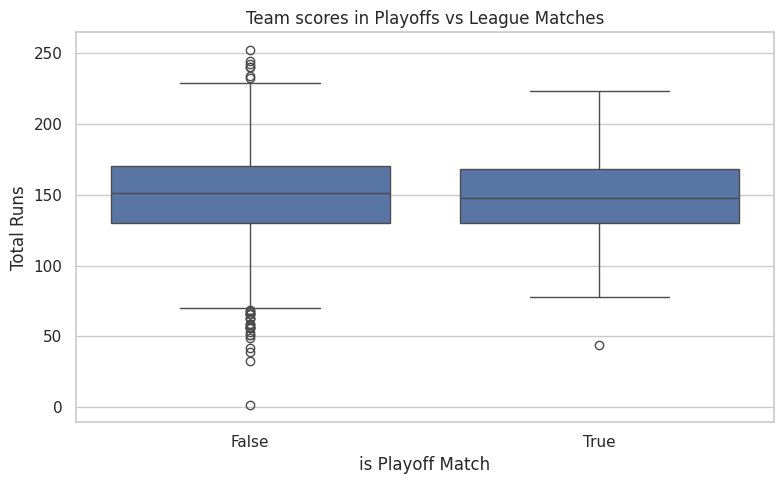

In [ ]:
# Set plot style
sns.set(style='whitegrid')

#1. Average Runs in playoffs vs League matches
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='is_playoff', y='total_runs')
plt.title('Team scores in Playoffs vs League Matches')
plt.xlabel('is Playoff Match')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()

In [ ]:
# Seperate scores into two groups based on is_playoff flag
playoff_scores = merged[merged['is_playoff'] == True]['total_runs']
league_scores = merged[merged['is_playoff'] == False]['total_runs']

# Run the Mann-Whitney U test (non-parametric test for median differences)
u_statistic, p_value = mannwhitneyu(playoff_scores, league_scores, alternative='two-sided')

# Display results
print(f"Mann-Whitney U-statistic: {u_statistic}")
print(f"p-value: {p_value}")

# Interpret the result
if p_value < 0.05:
  print("the difference in scores between playoffs and league matches is statistically significant.")
else:
  print("No statistically difference in scores between playoffs and league matches.")

Mann-Whitney U-statistic: 120770.0
p-value: 0.7668706992141119
No statistically difference in scores between playoffs and league matches.


In [ ]:
# choose your team (edit this)
team_name = "Royal Challengers Bangalore"

# Filter only this team's matches
team_data = merged[merged['batting_team'] == team_name]

# Seperate scores by match type
playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']
league_scores = team_data[team_data['is_playoff'] == False]['total_runs']

# Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(playoff_scores, league_scores, alternative='two-sided')

# Display results
print(f"Team: {team_name}")
print(f"Mann-Whitney U-statistic: {u_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
  print("the team shows a statistically scoring difference in playoff vs league matches")
else:
  print("No statistically difference in scores between playoffs and league matches.")

Team: Royal Challengers Bangalore
Mann-Whitney U-statistic: 1679.0
p-value: 0.4336911417202931
No statistically difference in scores between playoffs and league matches.


In [ ]:
teams = merged['batting_team'].unique()

for team in teams:
  team_data = merged[merged['batting_team'] == team]
  playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']
  league_scores = team_data[team_data['is_playoff'] == False]['total_runs']

  if len(playoff_scores) >=3 and len(league_scores) >=3:
    u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')
    print(f"Mann-Whitney U Test Results for {team}:")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Tick")
    else:
        print("cross")

Mann-Whitney U Test Results for Kolkata Knight Riders:
P-value: 0.8206
cross
Mann-Whitney U Test Results for Royal Challengers Bangalore:
P-value: 0.4337
cross
Mann-Whitney U Test Results for Chennai Super Kings:
P-value: 0.3327
cross
Mann-Whitney U Test Results for Kings XI Punjab:
P-value: 0.6591
cross
Mann-Whitney U Test Results for Delhi Daredevils:
P-value: 0.0892
cross
Mann-Whitney U Test Results for Rajasthan Royals:
P-value: 0.8971
cross
Mann-Whitney U Test Results for Mumbai Indians:
P-value: 0.4349
cross
Mann-Whitney U Test Results for Deccan Chargers:
P-value: 0.0997
cross
Mann-Whitney U Test Results for Sunrisers Hyderabad:
P-value: 0.7162
cross
Mann-Whitney U Test Results for Delhi Capitals:
P-value: 0.9859
cross
Mann-Whitney U Test Results for Gujarat Titans:
P-value: 0.4976
cross


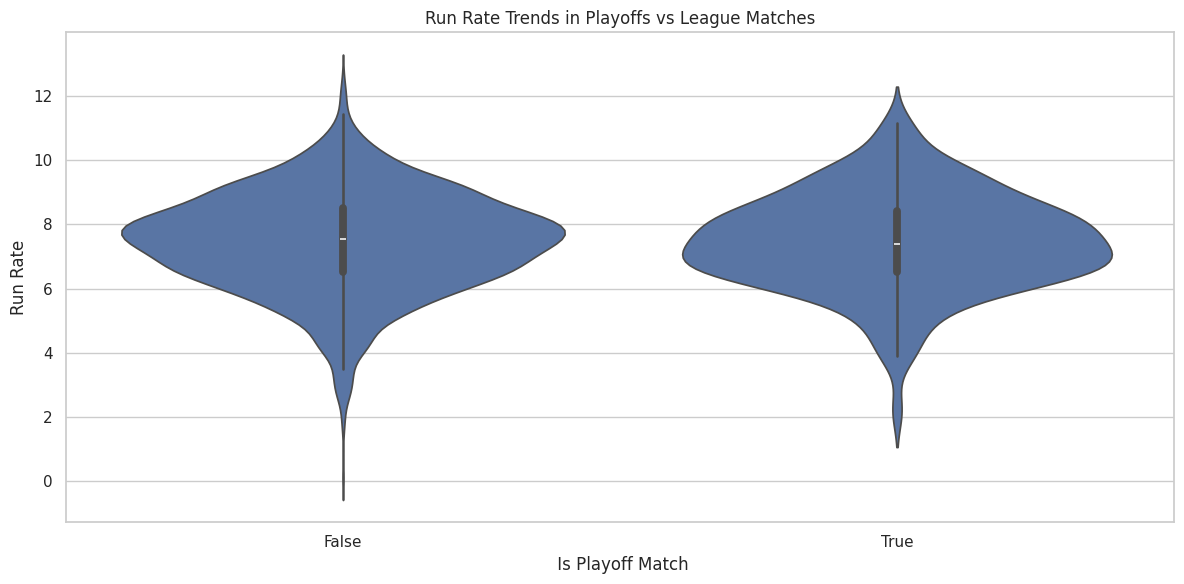

In [ ]:
# Run Rate trends in playoff vs league matches

plt.figure(figsize=(12, 6))
sns.violinplot(x='is_playoff', y='run_rate', data=merged)
plt.title('Run Rate Trends in Playoffs vs League Matches')
plt.xlabel(' Is Playoff Match')
plt.ylabel('Run Rate')
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: split the run rate data based on is_playoff
playoff_run_rate = merged[merged['is_playoff'] == True]['run_rate']
league_run_rate = merged[merged['is_playoff'] == False]['run_rate']

#step 2 : run the mann-whitney u test
u_statistic, p_value = mannwhitneyu(league_run_rate, playoff_run_rate, alternative='two-sided')

#step 3: print the results
print("Mann-Whitney U statistic:", u_statistic)
print("p-value:", p_value)

#step 4: intercept the result
if p_value < 0.05:
    print("There is a significant difference in median run rates between league and playoff teams.")
else:
    print("There is no significant difference in median run rates between league and playoff teams.")

Mann-Whitney U statistic: 124606.0
p-value: 0.7668706992141119
There is no significant difference in median run rates between league and playoff teams.


In [ ]:
# create an emplty list to store results
results = []

#loop through each unique teams
teams = merged['batting_team'].unique()

for team in teams:
  #filter data for this team
  team_data = merged[merged['batting_team'] == team]

  #seperate run rates match type
  playoff_run_rate = team_data[team_data['is_playoff'] == True]['run_rate']
  league_run_rate = team_data[team_data['is_playoff'] == False]['run_rate']

  #Ensure enough data points in each group to make a fair comparision
  if len(playoff_run_rate) >= 3 and len(league_run_rate) >= 3:
    #run the mann-whitney u test
    u_statistic, p_value = mannwhitneyu(league_run_rate, playoff_run_rate, alternative='two-sided')

    # append the results
    results.append({
        'Team': team,
        'P_value':p_value,
        'Significant': 'Tick' if p_value < 0.05 else 'Cross'
    })

#create a dataframe from the results
results_df = pd.DataFrame(results)

#display the results
print(results_df)


                           Team   P_value Significant
0         Kolkata Knight Riders  0.820574       Cross
1   Royal Challengers Bangalore  0.433691       Cross
2           Chennai Super Kings  0.332693       Cross
3               Kings XI Punjab  0.659112       Cross
4              Delhi Daredevils  0.089151       Cross
5              Rajasthan Royals  0.897111       Cross
6                Mumbai Indians  0.434927       Cross
7               Deccan Chargers  0.099655       Cross
8           Sunrisers Hyderabad  0.716164       Cross
9                Delhi Capitals  0.985860       Cross
10               Gujarat Titans  0.497628       Cross


In [ ]:
merged['home_team']=merged['batting_team'] == merged['team1']
merged['away_team']=merged['batting_team'] == merged['team2']

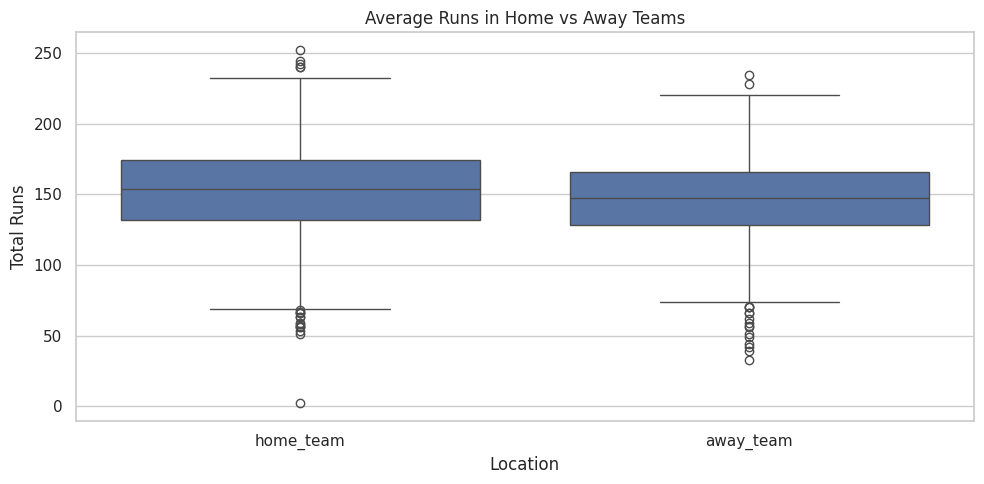

In [ ]:
# melt the data set to reshape for home and away team comparison
home_away_df = merged.melt(id_vars=['total_runs'], value_vars=['home_team','away_team'],var_name='location',value_name='is_true')

#filter for only the rows where the condition (home/true) is true
home_away_df = home_away_df[home_away_df['is_true']]

plt.figure(figsize=(10,5))
sns.boxplot(data = home_away_df, x='location',y='total_runs')
plt.title('Average Runs in Home vs Away Teams')
plt.xlabel('Location')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()

In [ ]:
# step 1: extract the two groups
home_scores = merged[merged['home_team'] == True]['total_runs']
away_scores = merged[merged['away_team'] == True]['total_runs']

# step 2: run mann-whitney u test
u_statistic, p_value = mannwhitneyu(home_scores, away_scores, alternative='two-sided')

#step 3: print the results
print("Mann-Whitney U statistic:", u_statistic)
print("p-value:", p_value)

#step 4: intercept the result
if p_value < 0.05:
    print("There is a significant difference in median scores between home and away teams.")
else:
    print("There is no significant difference in median scores between home and away teams.")

Mann-Whitney U statistic: 581106.0
p-value: 1.2376099361250964e-05
There is a significant difference in median scores between home and away teams.


In [ ]:
# show the missing values in the each column
print("Number of missing values in each column:")
print(merged.isnull().sum())

# check if any missing value exist
print("\nAre there any missing values in the dataset?\n",merged.isnull().any())

#percent of missing values per column
missing_percentage = (merged.isnull().mean()* 100)
print("\nPercentage of missing values per column:")
print(missing_percentage)

#show just the rows that have missing values
missing_rows = merged[merged.isnull().any(axis=1)]
print("\nRows with missing values:")
print(missing_rows)

Number of missing values in each column:
match_id        0
batting_team    0
total_runs      0
date            0
venue           0
team1           0
team2           0
Period          0
run_rate        0
year            0
is_playoff      0
home_team       0
away_team       0
dtype: int64

Are there any missing values in the dataset?
 match_id        False
batting_team    False
total_runs      False
date            False
venue           False
team1           False
team2           False
Period          False
run_rate        False
year            False
is_playoff      False
home_team       False
away_team       False
dtype: bool

Percentage of missing values per column:
match_id        0.0
batting_team    0.0
total_runs      0.0
date            0.0
venue           0.0
team1           0.0
team2           0.0
Period          0.0
run_rate        0.0
year            0.0
is_playoff      0.0
home_team       0.0
away_team       0.0
dtype: float64

Rows with missing values:
Empty DataFrame
Columns

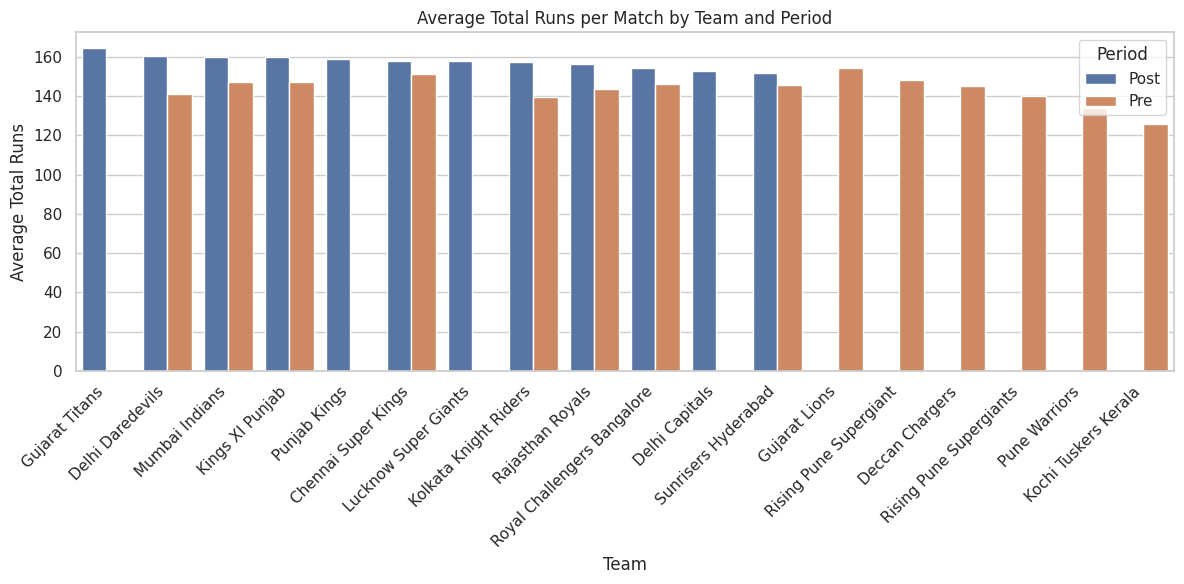

In [ ]:
# group by team and period to caluculate the average total runs per match
top_scoring_team = (merged.groupby(['batting_team', 'Period'])['total_runs']
                    .mean()
                    .reset_index()
                    .sort_values(by=['Period','total_runs'], ascending=[True,False])
                    )

#plot figure using barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_scoring_team, x='batting_team', y='total_runs', hue='Period')

#beautify the plot
plt.title('Average Total Runs per Match by Team and Period')
plt.xlabel('Team')
plt.ylabel('Average Total Runs')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

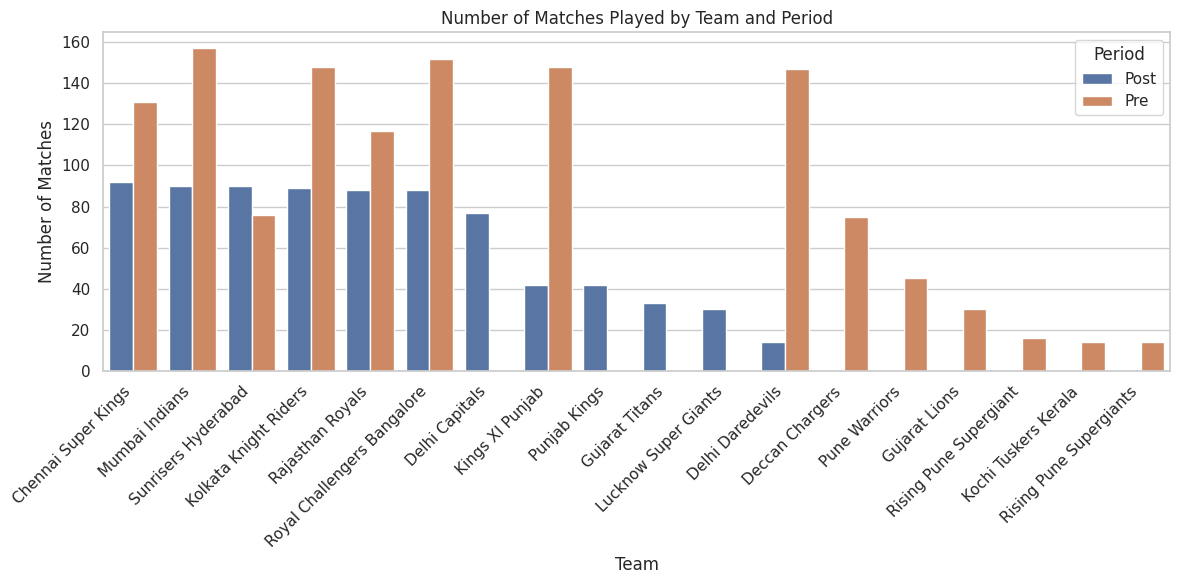

In [ ]:
# count the no of matches played per team
match_freq = (merged.groupby(['batting_team', 'Period'])['match_id'].nunique()
              .reset_index()
              .rename(columns={'match_id': 'match_count'})
              )
# sort for clarity
match_freq = match_freq.sort_values(by=['Period','match_count'], ascending=[True,False])

#plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=match_freq, x='batting_team', y='match_count', hue='Period')

#beautify the plot
plt.title('Number of Matches Played by Team and Period')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#set the minimum matches
min_matches = 10

#step 1: count matches per team per period
match_counts = (merged.groupby(['batting_team', 'Period'])['match_id'].nunique()
              .reset_index()
              .rename(columns={'match_id': 'match_count'})
              )

#step 2: pivout to get pre and post match counts in seperate columns
match_counts_pivot = match_counts.pivot(index='batting_team', columns='Period', values='match_count').fillna(0)

# step 3: fillter teams that meet minimum match criteria in both periods
qualified_teams = match_counts_pivot[(match_counts_pivot.get('Pre',0) >= min_matches) & (match_counts_pivot.get('Post',0) >= min_matches)].index.tolist()

#step 4: filter original merged dataset to included only qualified teams
qualified_data = merged[merged['batting_team'].isin(qualified_teams)]

#display filtered team list and shape of filtered dataset
print("Qualified Teams:")
print(qualified_teams)
print("\nFiltered Dataset Shape:", qualified_data.shape)

Qualified Teams:
['Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']

Filtered Dataset Shape: (1669, 13)


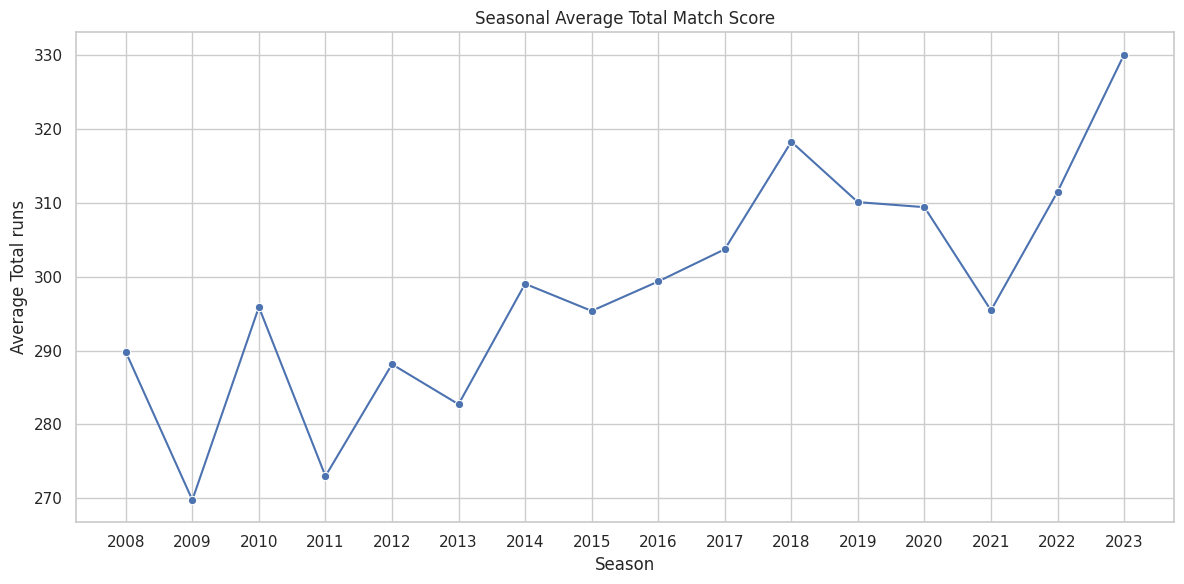

In [ ]:
# step 1 : Compute total runs by match_id and batting_team
match_totals =(
    merged.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
)

#step 2: sum both team totals to get the total score for each match
match_scores = (
    match_totals.groupby('match_id')['total_runs'].sum().reset_index().rename(columns={'total_runs': 'total_match_score'})
)

#step 3: merge with match_info to get the match date
match_info = match_info_data[['id', 'date']].copy()
match_info['date'] = pd.to_datetime(match_info['date'],errors='coerce')
match_info.rename(columns={'id': 'match_id'}, inplace=True)

#merge scores with date info
match_scores = pd.merge(match_scores, match_info, on='match_id')

#step 4: extract year
match_scores['year'] = match_scores['date'].dt.year

#step 5 : calculate average total match score per season
seasonal_scores =(
    match_scores.groupby('year')['total_match_score'].mean().reset_index().rename(columns={'total_match_score': 'seasonal_average'})
)

#step 6: plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_scores, x='year', y='seasonal_average',marker='o')
plt.title('Seasonal Average Total Match Score')
plt.xlabel('Season')
plt.ylabel('Average Total runs')
plt.xticks(seasonal_scores['year'])
plt.grid(True)
plt.tight_layout()
plt.show()

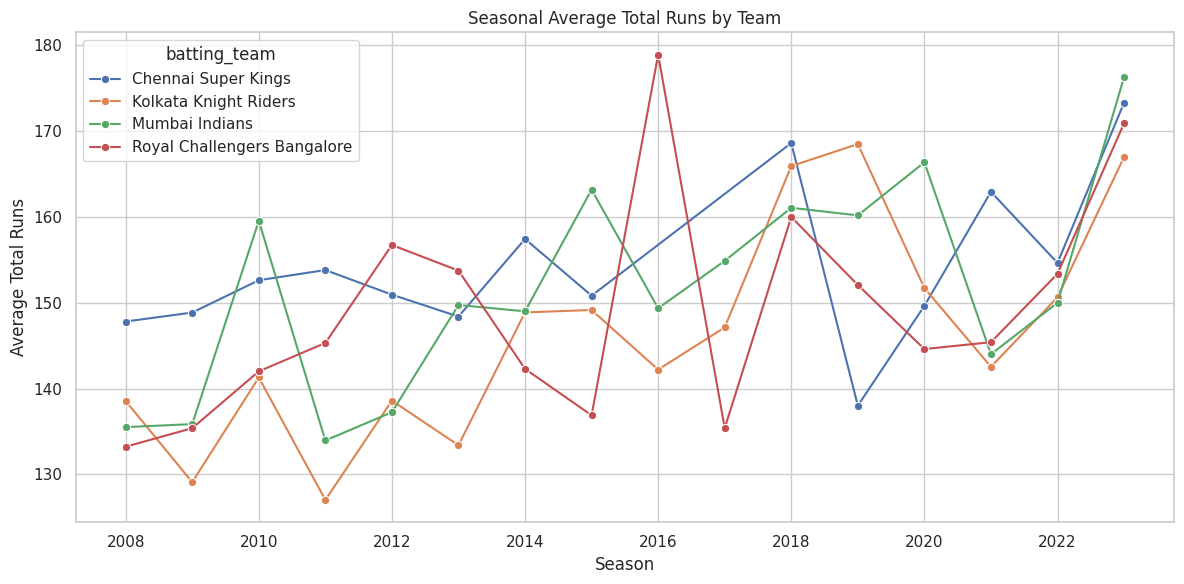

In [ ]:
# compute average runs scored by each team per season
team_seasonal_scores = (
    merged.groupby(['batting_team', 'year'])['total_runs'].mean().reset_index().rename(columns={'total_runs': 'seasonal_average'})
)

#plot for major teams
plt.figure(figsize=(12, 6))
top_teams = ['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Royal Challengers Bangalore']
sns.lineplot(data=team_seasonal_scores[team_seasonal_scores['batting_team'].isin(top_teams)], x='year', y='seasonal_average', hue='batting_team', marker='o')
plt.title('Seasonal Average Total Runs by Team')
plt.xlabel('Season')
plt.ylabel('Average Total Runs')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew,kurtosis

#claculate skewness and kurtosis
skewness = merged['total_runs'].skew()
skewness_1 = merged['run_rate'].skew()
kurtosis_1 = merged['total_runs'].kurtosis()
kurtosis_2 = merged['run_rate'].kurtosis()

#print results
print("Skewness of total runs:", skewness)
print("Kurtosis of total runs:", kurtosis_1)
print("Skewness of total run_rate:", skewness_1)
print("Kurtosis of total run_rate:", kurtosis_2)


#convert boolean columns to int
merged['home_team_int'] = merged['home_team'].astype(int)
merged['away_team_int'] = merged['away_team'].astype(int)

#corelation matrix
correlation_matrix = merged[['total_runs','run_rate','home_team_int','away_team_int']].corr()
print("\ncorerelation matrix:\n",correlation_matrix)


Skewness of total runs: -0.3163585400852792
Kurtosis of total runs: 0.6014110839941753
Skewness of total run_rate: -0.31635854008527636
Kurtosis of total run_rate: 0.6014110839941722

corerelation matrix:
                total_runs  run_rate  home_team_int  away_team_int
total_runs       1.000000  1.000000       0.096941      -0.096941
run_rate         1.000000  1.000000       0.096941      -0.096941
home_team_int    0.096941  0.096941       1.000000      -1.000000
away_team_int   -0.096941 -0.096941      -1.000000       1.000000


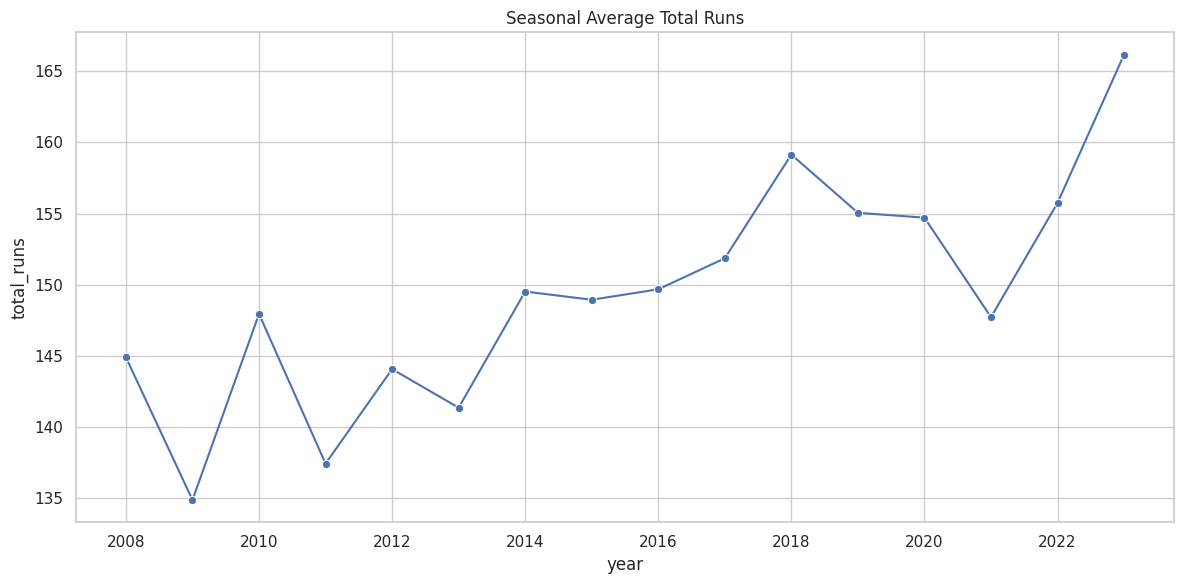

In [ ]:
seasonal_avg = (merged.groupby('year')['total_runs'].mean().reset_index())
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_avg, x='year', y='total_runs',marker='o')
plt.title('Seasonal Average Total Runs')
plt.grid(True)
plt.tight_layout()
plt.show()

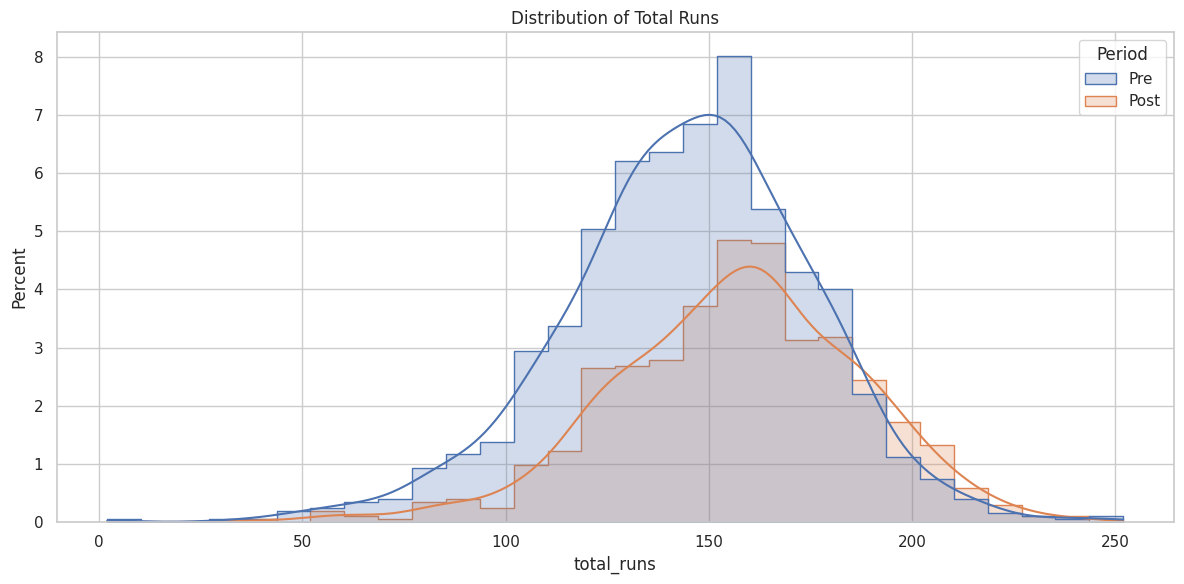

In [ ]:
# distribution plots
plt.figure(figsize=(12, 6))
sns.histplot(data=merged, bins=30, kde=True,x='total_runs',hue='Period',element='step',stat='percent')
plt.title('Distribution of Total Runs')
plt.grid(True)
plt.tight_layout()

In [ ]:
#Hypothesis testing
u_statistic, p_value = mannwhitneyu(pre_scores, post_scores, alternative='two-sided')
print("Mann-Whitney U Test : U-statistic =", u_statistic, "p-value =",p_value)

def cohen_d(x,y):
  nx = len(x)
  ny = len(y)
  dof = nx + ny - 2
  pooled_std = np.sqrt(((nx-1) * np.var(x, ddof=1)+ (ny-1)*np.var(y,ddof=1)) / dof)
  return (np.mean(x) - np.mean(y)) / pooled_std

effect_size = cohen_d(post_scores, pre_scores)
print("Cohen's d Effect Size:", effect_size)

Mann-Whitney U Test : U-statistic = 381621.5 p-value = 1.454889995517028e-17
Cohen's d Effect Size: 0.3901739611740549


In [ ]:
# Bootstrap Confidence Interval

def bootstrap_diff_means(x, y, n_bootstrap=1000):
  diffs = [np.mean(resample(y)) - np.mean(resample(x)) for _ in range(n_bootstrap)]
  return np.percentile(diffs, [2.5, 97.5]), np.mean(diffs)

ci_bounds, mean_diff = bootstrap_diff_means(pre_scores, post_scores)
print("Bootstrap Confidence Interval:", ci_bounds)
print("Mean Difference:", mean_diff)

Bootstrap Confidence Interval: [ 9.15366421 14.63503556]
Mean Difference: 11.839417231394462


In [ ]:
# Linear Regression
seasonal_data = merged.groupby('year')['total_runs'].mean().reset_index()
X = sm.add_constant(seasonal_data['year'])
y = seasonal_data['total_runs']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             total_runs   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     25.68
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           0.000172
Time:                        05:35:11   Log-Likelihood:                -47.087
No. Observations:                  16   AIC:                             98.17
Df Residuals:                      14   BIC:                             99.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2569.0983    536.414     -4.789      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
seasonal_data

,year,total_runs
0,2008,144.905172
1,2009,134.877193
2,2010,147.950000
3,2011,137.434483
4,2012,144.074324
5,2013,141.361842
6,2014,149.525000
7,2015,148.948718
8,2016,149.683333
9,2017,151.864407


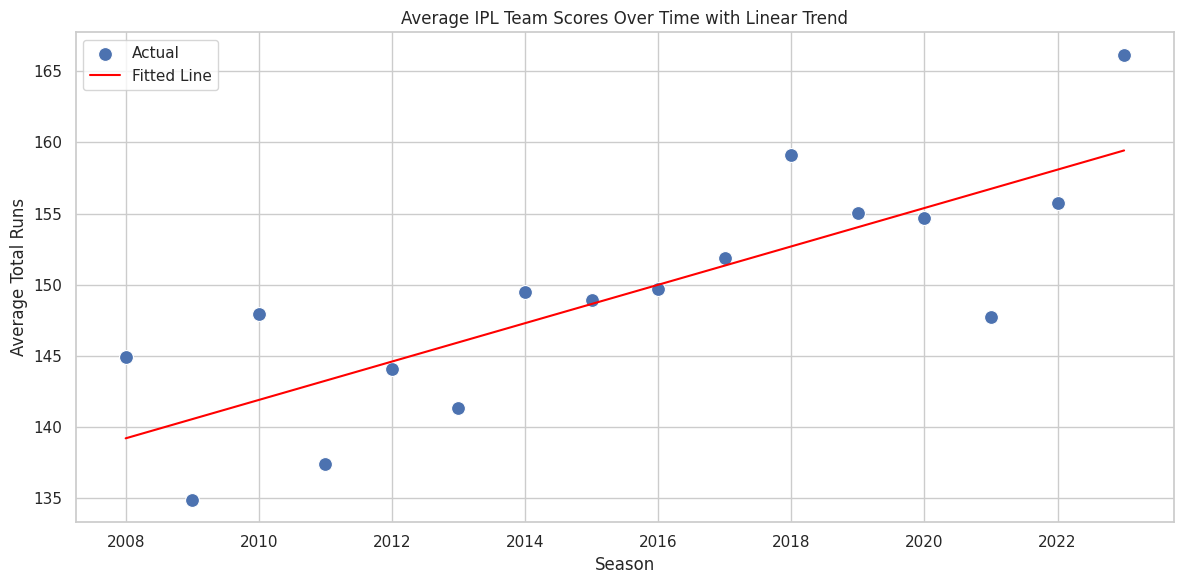

In [ ]:
#Predict values using the model
seasonal_data['predicted'] = model.predict(X)

#Plot actual vs predicted
plt.figure(figsize=(12, 6))
sns.scatterplot(data=seasonal_data, x='year', y='total_runs', label='Actual', s=100)
sns.lineplot(data=seasonal_data, x='year', y='predicted', label='Fitted Line', color='red')

plt.title('Average IPL Team Scores Over Time with Linear Trend')
plt.xlabel('Season')
plt.ylabel('Average Total Runs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()